**Irradiance, PSF and MTF**   
**Author: Ramesh Bhatta, CIS, RIT**

In [4]:
# Importing Packages

import numpy as np
import matplotlib.pyplot as plt

In [5]:
## Predefined plot preferences--> This is my usual plot preference

# Define text sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

# Apply text size settings
plt.rc('font', size=SMALL_SIZE)          # Default font size
plt.rc('axes', titlesize=MEDIUM_SIZE)   # Axis title font size
plt.rc('axes', labelsize=MEDIUM_SIZE)   # Axis labels font size
plt.rc('xtick', labelsize=SMALL_SIZE)   # X-axis tick label font size
plt.rc('ytick', labelsize=SMALL_SIZE)   # Y-axis tick label font size
plt.rc('legend', fontsize=SMALL_SIZE)   # Legend font size
plt.rc('figure', titlesize=BIGGER_SIZE) # Figure title font size

## **Question 2: Zernike ploynomials**

In [6]:
## HyperGaussian Aperture 

N = 4096
del_x = 1
a = np.sqrt(N/np.pi)
n_cen = 1 + (N/2)
x,y = np.meshgrid(np.arange(1,N+1),np.arange(1,N+1))
x_l = (x - n_cen)* del_x
y_l = (y - n_cen)* del_x
A = np.exp(-((x_l**2 + y_l**2)/a**2)**50)


## Oblique Trefoil: phi_0 = 2π 

phi_0 = 2 * np.pi
r_l = np.sqrt(x_l ** 2 + y_l ** 2 )
theta_l = np.arctan2(y_l,x_l)
phi = phi_0 * ((r_l/a)**3) * np.cos(3*theta_l)

## Electric field

E = A * np.exp(1j * phi)


## **Question 2A and 2B**

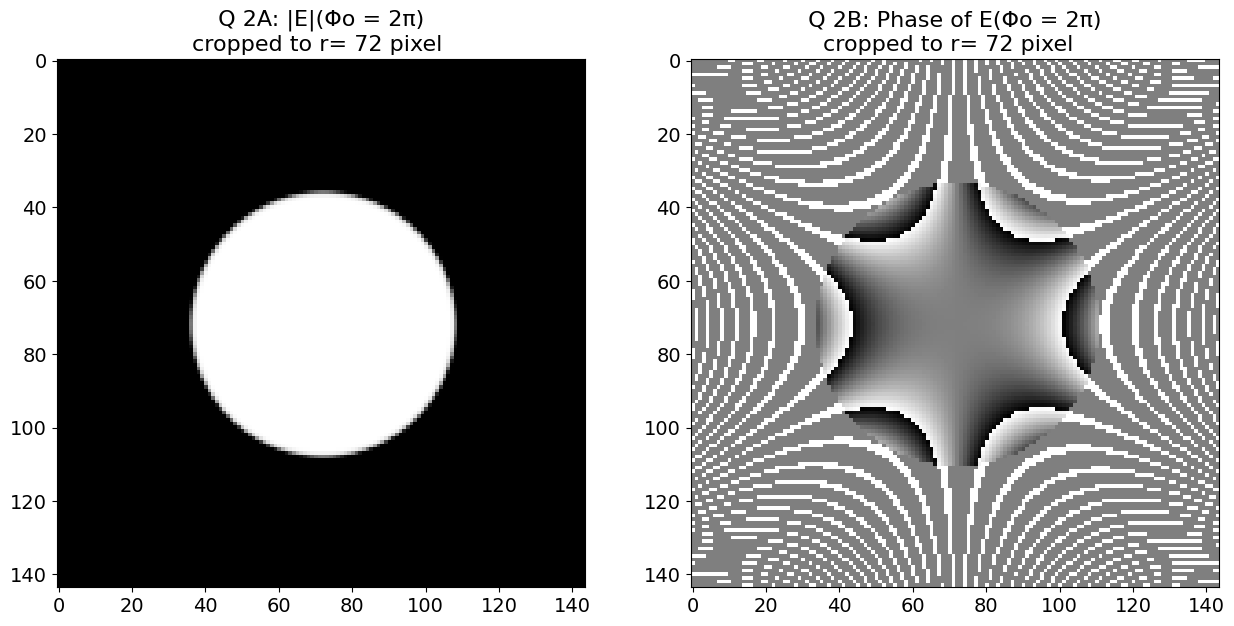

In [7]:
magn = np.abs(E)
phase = np.angle(E)

#plot

fig = plt.figure(figsize = (15,15))
fig.add_subplot(121)
plt.imshow(magn[N//2- 2*int(a):N//2+ 2*int(a),N//2-2*int(a):N//2+2*int(a)], cmap ='gray')
plt.title(" Q 2A: |E|(Φo = 2π) \ncropped to r= 72 pixel ")
fig.add_subplot(122)
plt.imshow(phase[N//2- 2*int(a):N//2+ 2*int(a),N//2-2*int(a):N//2+2*int(a)] , cmap ='gray')
plt.title(" Q 2B: Phase of E(Φo = 2π) \ncropped to r= 72 pixel  ")
plt.show()

## **Question  2C, 2D and 2E**

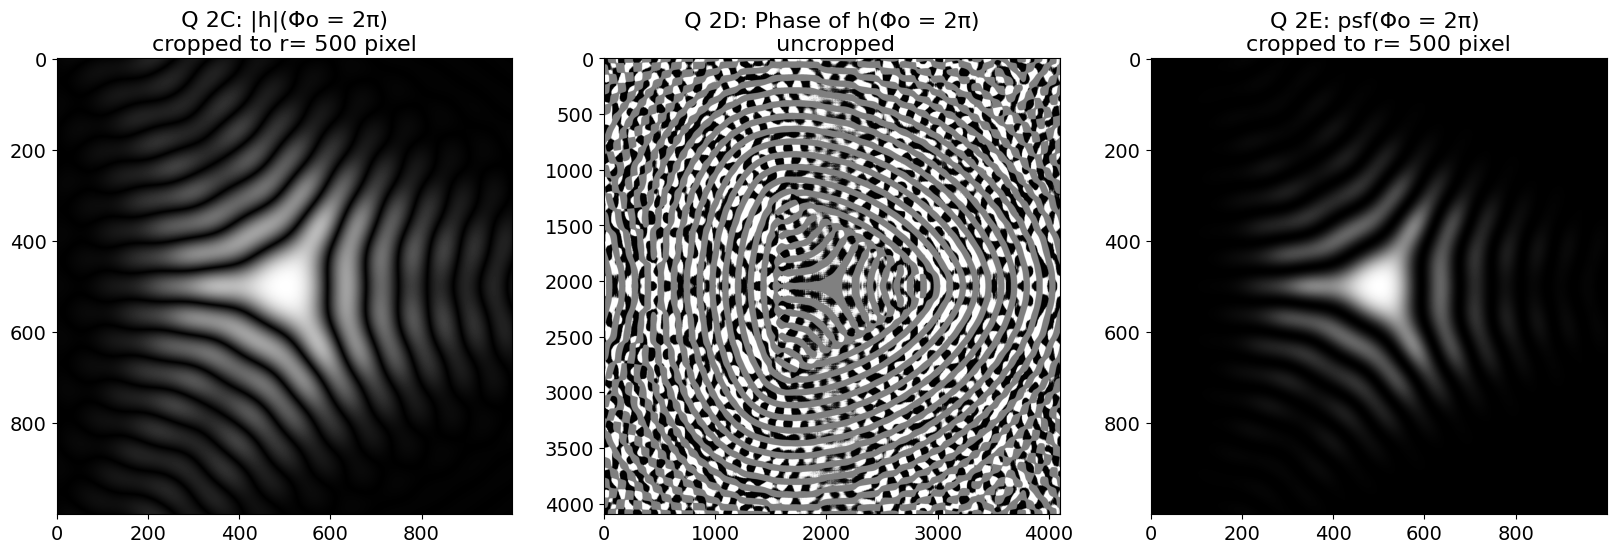

In [8]:
h = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(E)))
psf = (np.abs(h)) ** 2

#plot 
fig = plt.figure(figsize = (20,20))
fig.add_subplot(131)
plt.imshow(np.abs(h)[N//2- 500:N//2+ 500,N//2-500:N//2+500], cmap ='gray')
plt.title(" Q 2C: |h|(Φo = 2π) \ncropped to r= 500 pixel")
fig.add_subplot(132)
plt.imshow(np.angle(h) , cmap ='gray')
plt.title(" Q 2D: Phase of h(Φo = 2π) \n uncropped")
fig.add_subplot(133)
plt.imshow(psf[N//2- 500:N//2+ 500,N//2-500:N//2+500], cmap = 'gray')
plt.title("Q 2E: psf(Φo = 2π) \ncropped to r= 500 pixel")
plt.show()

## **Question 2F and 2G**

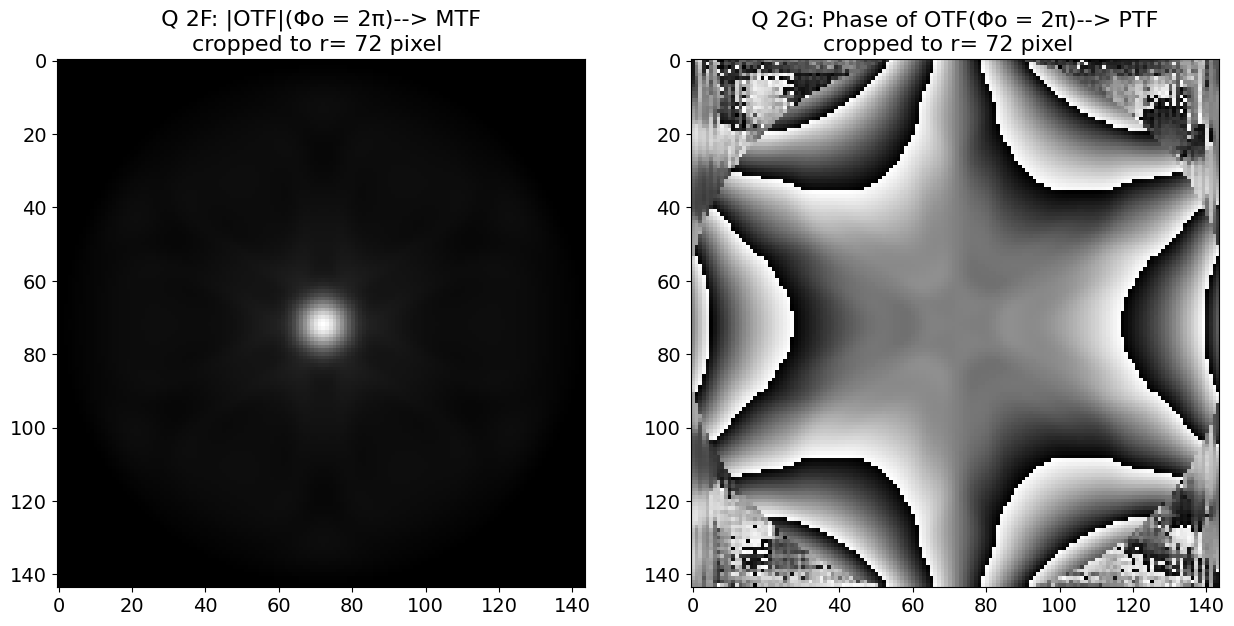

In [9]:
OTF = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(psf)))

#plot 
fig = plt.figure(figsize = (15,15))
fig.add_subplot(121)
plt.imshow(np.abs(OTF)[N//2- 2*int(a):N//2+ 2*int(a),N//2-2*int(a):N//2+2*int(a)], cmap ='gray')
plt.title(" Q 2F: |OTF|(Φo = 2π)--> MTF \ncropped to r= 72 pixel ")

fig.add_subplot(122)
plt.imshow(np.angle(OTF)[N//2- 2*int(a):N//2+ 2*int(a),N//2-2*int(a):N//2+2*int(a)] , cmap ='gray')
plt.title(" Q 2G: Phase of OTF(Φo = 2π)--> PTF \ncropped to r= 72 pixel  ")
plt.show()

## **Question 3: Ideal, MTF, OTF**

In [10]:
## Repeating step a to f for this question:

## Oblique Trefoil: phi_0 = 0 

phi_0_new = 0
r_l = np.sqrt(x_l ** 2 + y_l ** 2 )
theta_l = np.arctan2(y_l,x_l)
phi_new = phi_0_new * ((r_l/a)**3) * np.cos(3*theta_l)

## Electric field

E_new = A * np.exp(1j * phi_new)

## **Question 3A and 3B**

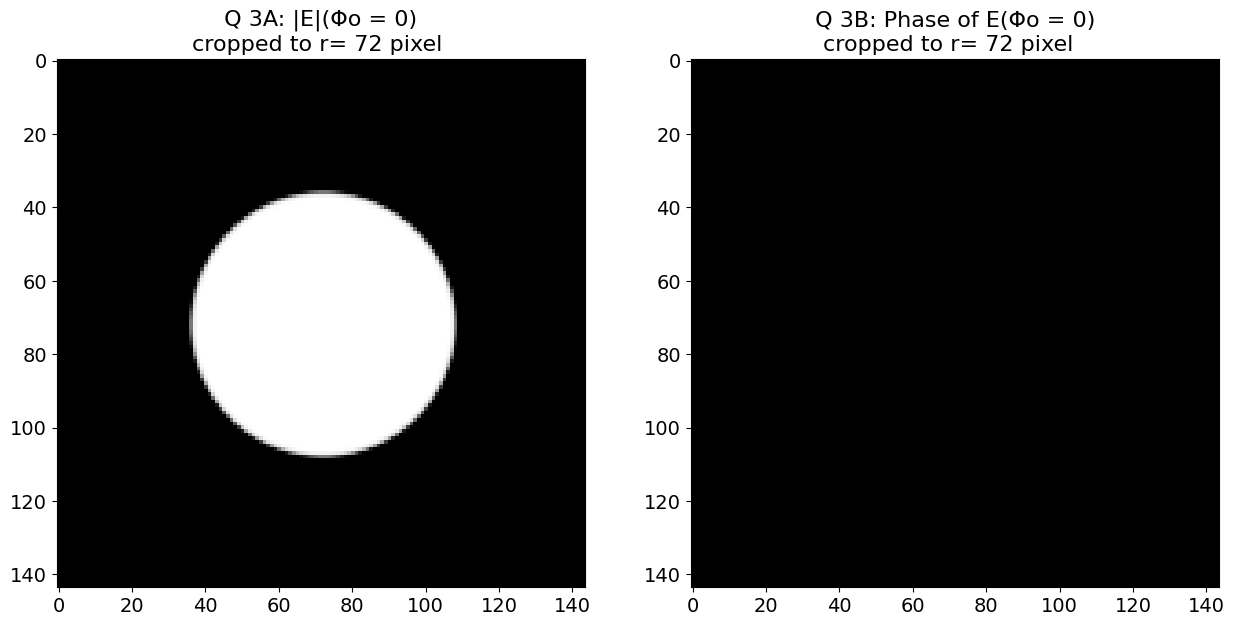

In [11]:
magn_new = np.abs(E_new)
phase_new = np.angle(E_new)

# plot
fig = plt.figure(figsize = (15,15))
fig.add_subplot(121)
plt.imshow(magn_new[N//2- 2*int(a):N//2+ 2*int(a),N//2-2*int(a):N//2+2*int(a)], cmap ='gray')
plt.title(" Q 3A: |E|(Φo = 0) \ncropped to r= 72 pixel ")

fig.add_subplot(122)
plt.imshow(phase_new[N//2- 2*int(a):N//2+ 2*int(a),N//2-2*int(a):N//2+2*int(a)] , cmap ='gray')
plt.title(" Q 3B: Phase of E(Φo = 0) \ncropped to r= 72 pixel  ")
plt.show()

## **Question 3C, 3D and 3E**

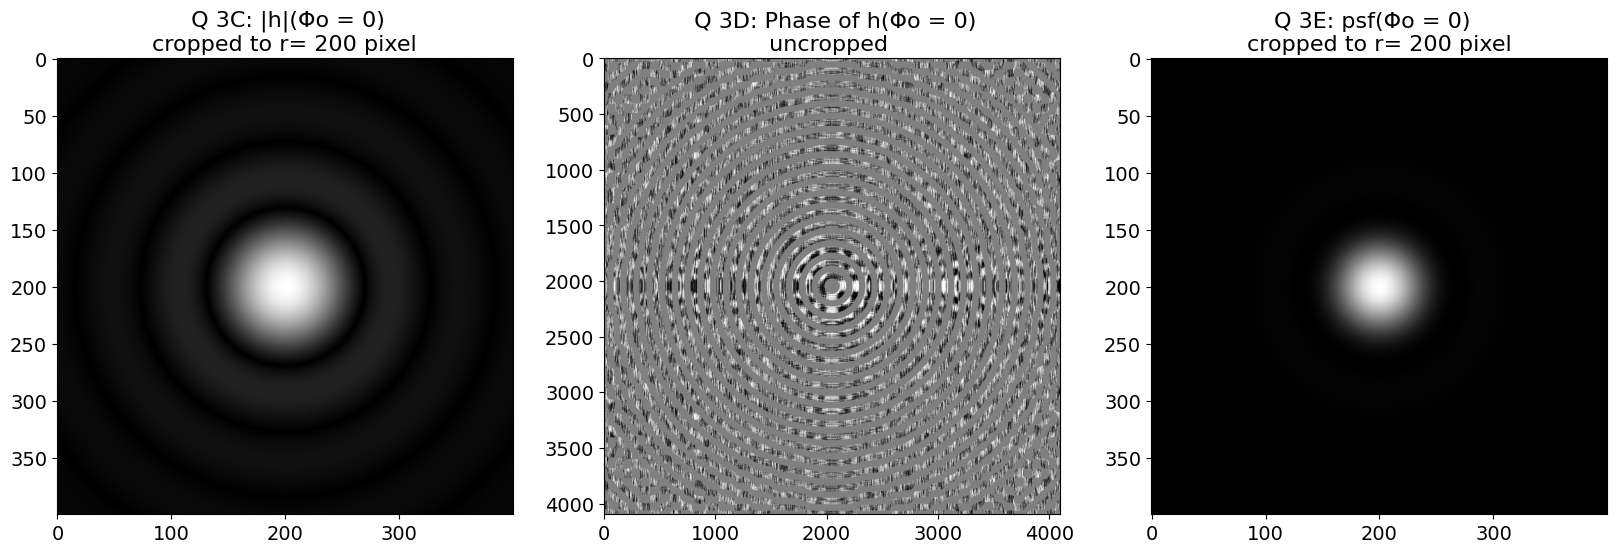

In [12]:
h_new = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(E_new)))
psf_new = (np.abs(h_new)) ** 2

#plot 
fig = plt.figure(figsize = (20,20))
fig.add_subplot(131)
plt.imshow(np.abs(h_new)[N//2- 200:N//2+ 200,N//2-200:N//2+200], cmap ='gray')
plt.title(" Q 3C: |h|(Φo = 0)\ncropped to r= 200 pixel")
fig.add_subplot(132)
plt.imshow(np.angle(h_new) , cmap ='gray')
plt.title(" Q 3D: Phase of h(Φo = 0)\n uncropped  ")
fig.add_subplot(133)
plt.imshow(psf_new[N//2- 200:N//2+ 200,N//2-200:N//2+200], cmap = 'gray')
plt.title("Q 3E: psf(Φo = 0)  \ncropped to r= 200 pixel")
plt.show()

## **Question 3F**

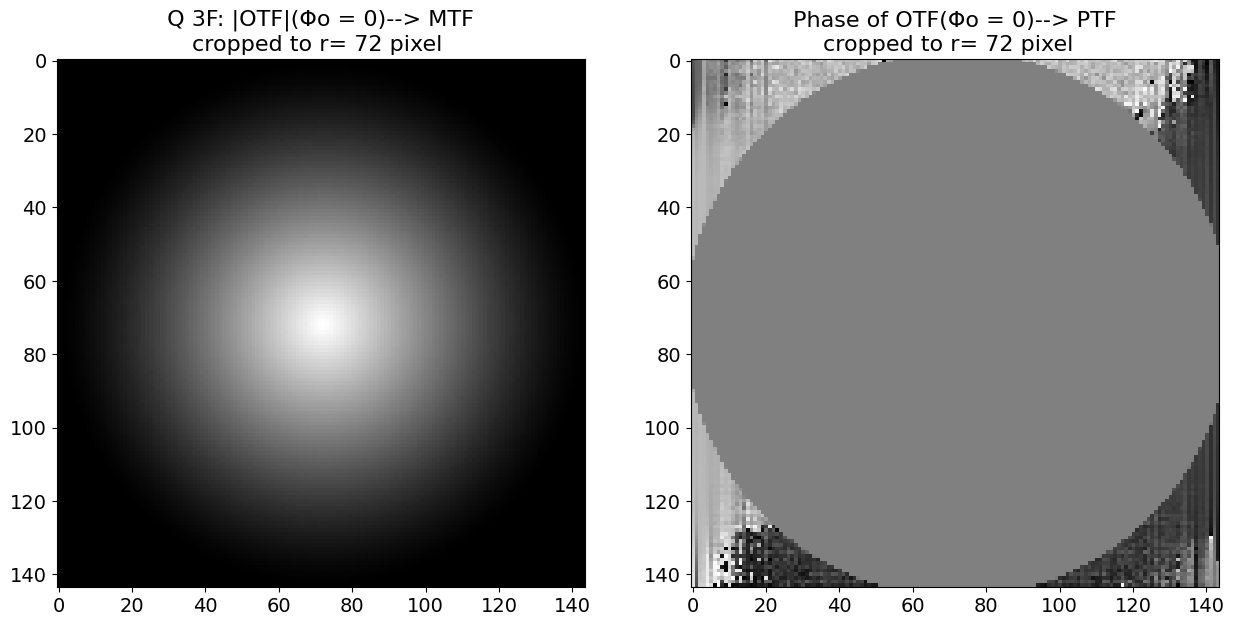

In [13]:
OTF_new = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(psf_new)))

#plot 
fig = plt.figure(figsize = (15,15))
fig.add_subplot(121)
plt.imshow(np.abs(OTF_new)[N//2- 2*int(a):N//2+ 2*int(a),N//2-2*int(a):N//2+2*int(a)], cmap ='gray')
plt.title(" Q 3F: |OTF|(Φo = 0)--> MTF \ncropped to r= 72 pixel ")
fig.add_subplot(122)
plt.imshow(np.angle(OTF_new)[N//2- 2*int(a):N//2+ 2*int(a),N//2-2*int(a):N//2+2*int(a)] , cmap ='gray')
plt.title(" Phase of OTF(Φo = 0)--> PTF \ncropped to r= 72 pixel  ")
plt.show()

## **Comments:**

**Aberrated Case Φo= 2π:**       
                In case of intial phase(Φo) = 2π, we can see that the point spread function is not a perfect bright spot(2e), but it bleeds into the other neighboring pixels too.This is due to the aberration of the wavefronts passing through the circular aperture. The reason for this is because the intial phase Φo = 2π introduces the phase aberration in the aperture function which results in the imperfect wavefront selection by the aperture giving an aberrated output. We can see these effect in the point spread response of the aperture function in above figures in part 2c, 2d and 2e. This effect can also be seen in the MTF and PTF images in part 2F and 2G where we can the significant distortion in the PTF introduced due to the intial phase term.

**Unaberrated Case Φo = 0:**   
               Similary in case of intial phase(Φo) = 0, the exponential term in the aperture function becomes "1", which gives a perfect circular aperture with no phase aberration. This results in the "perfect" bright spot in our psf figure(3e). The point spread function for this case is also uniform across all the frequencies/(pixels). So we can expect no aberration in this case. Also we can notice that on increasing value of Φo(results not shown here), the psf spread much more which increases the aberration. The effect on Point spread function is shown in results below for some different values of Φo.     

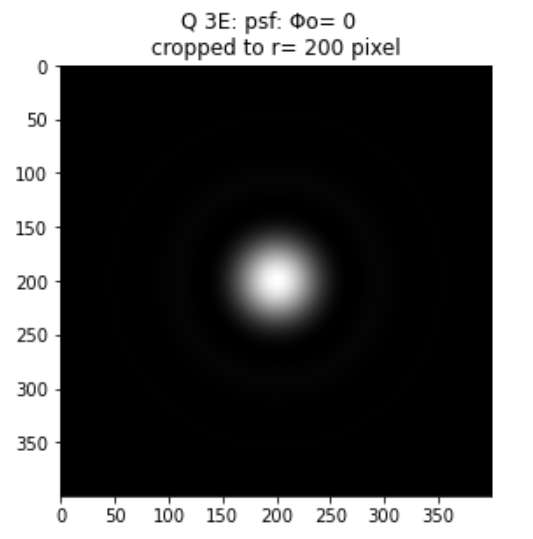 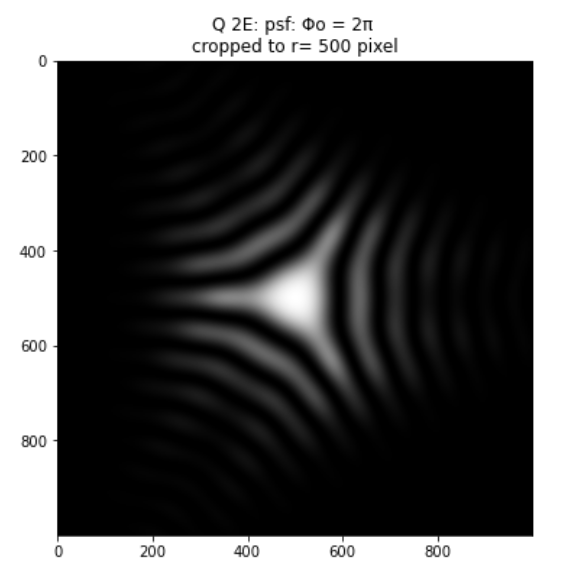
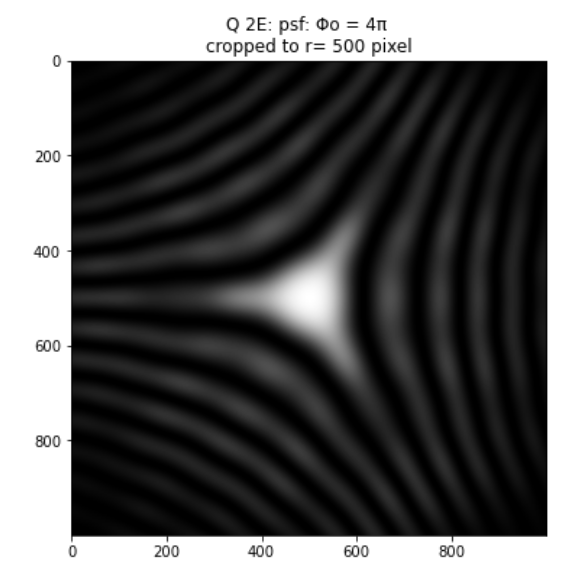 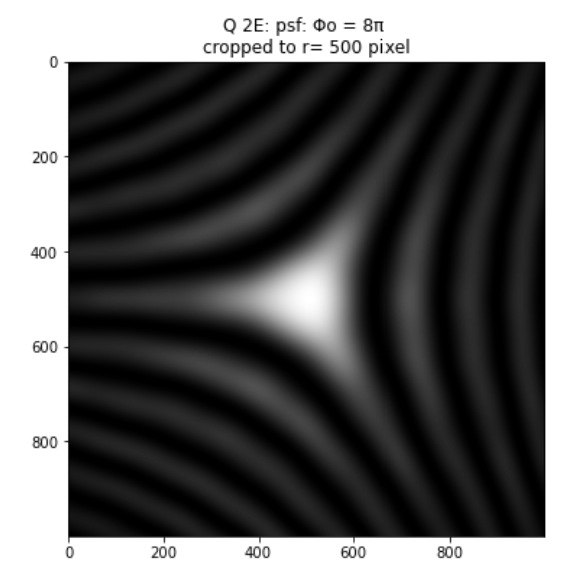

## **Question 4: Imaging a Startburst Pattern With and Without Aberrations**

In [14]:
N = 4096
n_cen = 1 + (N/2)
x,y = np.meshgrid(np.arange(1,N+1),np.arange(1,N+1))
x_o = (x - n_cen)
y_o = (y - n_cen)

## Amplitude Object

t_0 = np.arctan2(y_o, x_o)
gamma = 4*np.cos(8*t_0)
E_obj = np.exp(- (gamma ** 10))
FT_obj = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(E_obj)))

## **(Coherent) 4A and 4B: Irradiance Plot**

**E(image) = E(Object) x h(x,y)**

**this implies:**

**FT{E(image)} = FT{E(Object)}FT{h(x,y)}**

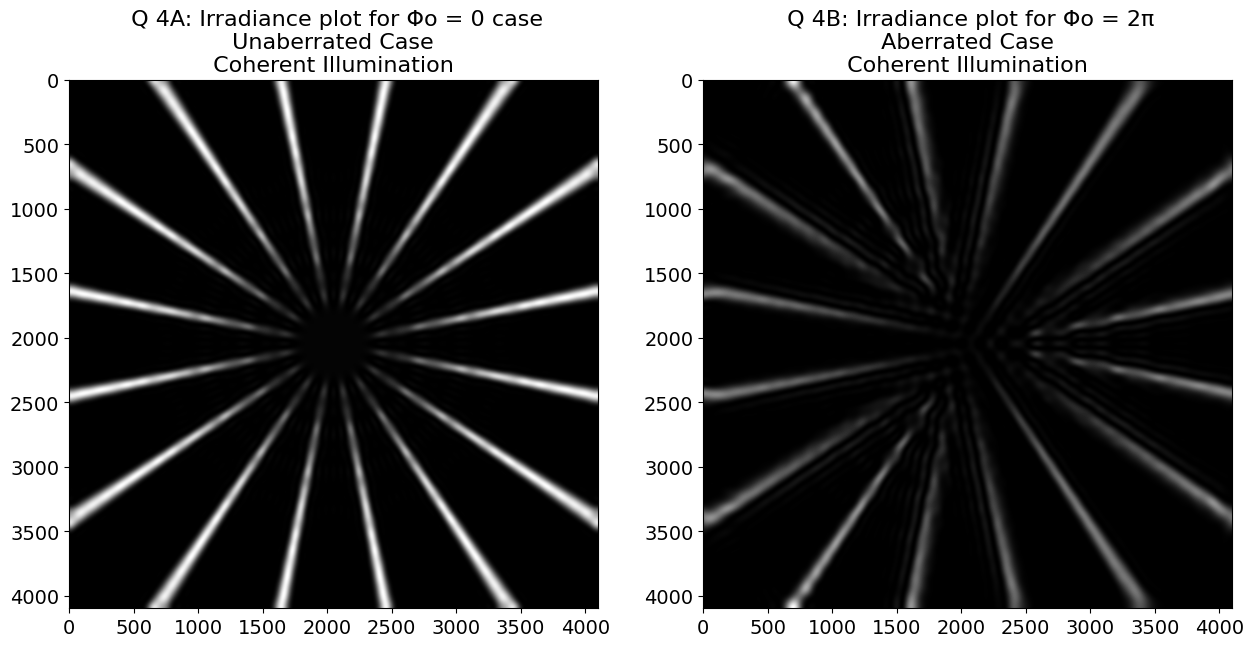

In [15]:
## Case a: Uaberrated Case

FT_1 = FT_obj * np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h_new)))
E_image_1 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(FT_1)))
irradiance_1 = np.abs(E_image_1)**2

## Case a: Aberrated Case

FT_2 = FT_obj * np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
E_image_2 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(FT_2)))
irradiance_2 = np.abs(E_image_2)**2

#plot

fig = plt.figure(figsize = (15,15))
fig.add_subplot(121)
plt.imshow(irradiance_1, cmap = 'gray')
plt.title(" Q 4A: Irradiance plot for Φo = 0 case\n Unaberrated Case \n Coherent Illumination ")
fig.add_subplot(122)
plt.imshow(irradiance_2, cmap = 'gray')
plt.title(" Q 4B: Irradiance plot for Φo = 2π\n Aberrated Case \n Coherent Illumination ")
plt.show()

## **4C- Qualitative Analysis:**

When comparing both image side by side as shown above, we can see that for Φo = 0 there is much lesser aberration than the case Φo = 2π. Also because some of the energy is also lost due to the aberration, the contrast and resolution is also much lower in the Φo = 2π case and it looks more blurry than irradiance plot for Φo = 0 case. And for increasing value of Φo, these aberrations also increase. 

## **(Incoherent) 4D and 4E: Irradiance Plot**

**FT{I(image)} = FT{I(Object)}FT{|h(x)|^2}**

**this implies:**

**I(image) = inv_FT(FT{I(image)})**

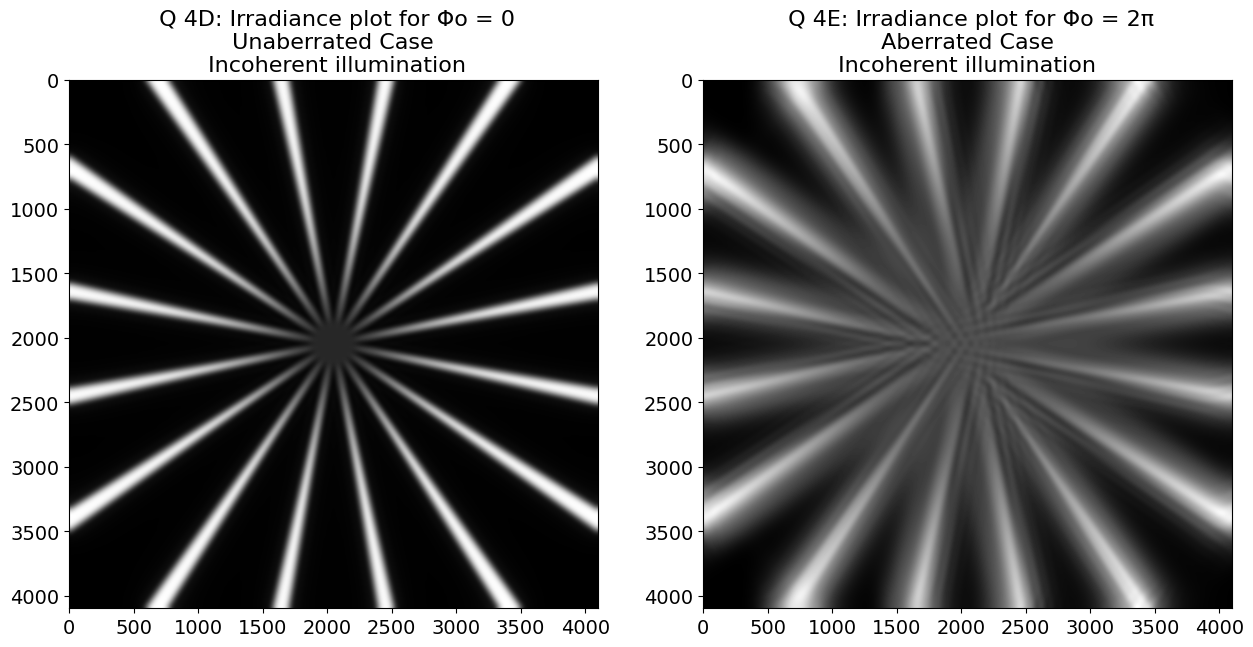

In [16]:
## For Unaberrated Case: phi_o = 0

i_object = (np.abs(E_obj)) ** 2
h_sqre_new = (np.abs(h_new)) ** 2
FT_3 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(h_sqre_new)))*np.fft.fftshift(np.fft.fft2(np.fft.fftshift(i_object)))
irradiance_3 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(FT_3)))


## Aberrated Case: phi_o =2pi

h_sqre = (np.abs(h))**2
FT_4 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(h_sqre)))*np.fft.fftshift(np.fft.fft2(np.fft.fftshift(i_object)))
irradiance_4 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(FT_4)))

#plot

fig = plt.figure(figsize = (15,15))
fig.add_subplot(121)
plt.imshow(np.abs(irradiance_3), cmap = 'gray')
plt.title(" Q 4D: Irradiance plot for Φo = 0\n Unaberrated Case \n Incoherent illumination")
fig.add_subplot(122)
plt.imshow(np.abs(irradiance_4), cmap = 'gray')
plt.title(" Q 4E: Irradiance plot for Φo = 2π\n Aberrated Case \n Incoherent illumination ")
plt.show()

## **4f Qualitative Analysis:**

Comparing both cases in above result we can see that, aberration in case of incoherent illumination shows the image to be appearing misaligned and distorted. Also the image losses the sharpness in Φo = 2π case. The energy is spread across the pixel grid in random fashion which results in such distortion. 
    
These types of aberration are associated with the imperfect imaging geometry. For example spherical aberration is a type of aberration occurs in the incoherent illumination case because light passing through the edge of lens gets refracted differently than the light passing through the center of it. And it introduces the distortion in the image.